In [42]:
from HESS_CNN_ProcessingDataFunctions import *
from HESS_CNN_CreateModelsFunctionsNoCRN import *

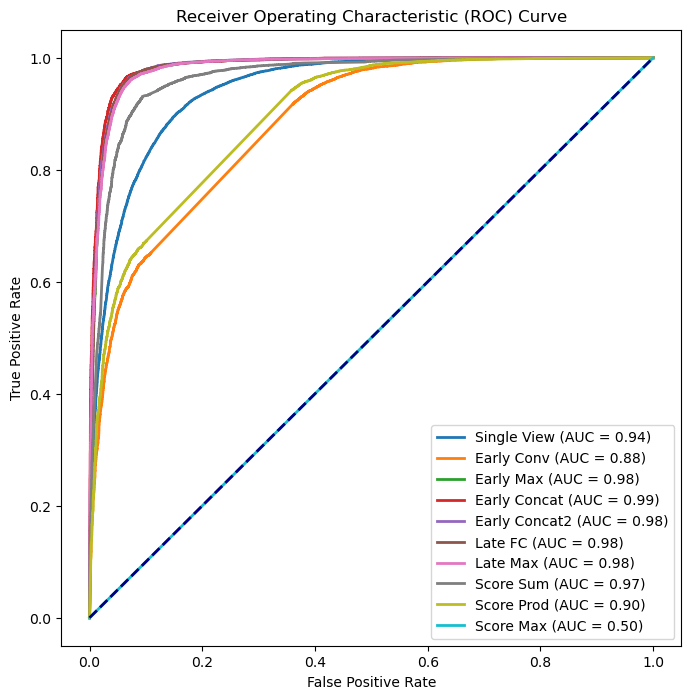

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve

def load_and_plot_roc_data(filename_bases, labels, folder_path):
    """
    Load and plot ROC data for multiple methods.

    Parameters:
    - filename_bases: List of filename bases for fpr, tpr, and roc_auc files.
    - labels: List of labels for each method.
    - folder_path: The path to the folder containing the ROC data files.

    Returns:
    None (plots the ROC curves).
    """
    plt.figure(figsize=(8, 8))

    for i, (filename_basis, label) in enumerate(zip(filename_bases, labels)):
        file_path_fpr = os.path.join(folder_path, f'{filename_basis}_fpr.npy')
        file_path_tpr = os.path.join(folder_path, f'{filename_basis}_tpr.npy')
        file_path_roc_auc = os.path.join(folder_path, f'{filename_basis}_roc_auc.npy')

        fpr = np.load(file_path_fpr)
        tpr = np.load(file_path_tpr)
        roc_auc = np.load(file_path_roc_auc)

        plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Example usage: Die unterschiedliche date_time machts nervig
filename_bases = [
    "2024-01-25_run3/roc_curve_All-MoDA-Base__singleCNN_latefc_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-25_22-15",
    "2024-01-25_run3/roc_curve_All-MoDA-Base_earlyconv_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-25_20-39", 
    "2024-01-25_run3/roc_curve_All-MoDA-Base_earlymax_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-25_20-51",
    "2024-01-25_run3/roc_curve_All-MoDA-Base_earlyconcat_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-25_21-01", 
    "2024-01-25_run3/roc_curve_All-MoDA-Base_earlyconcat2_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-25_21-13", 
    "2024-01-25_run3/roc_curve_All-MoDA-Base_latefc_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-25_22-15", 
    "2024-01-23_run2/roc_curve_All-MoDA-Base_latemax_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-23_21-30", 
    "2024-01-25_run3/roc_curve_All-MoDA-Base_scoresum_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-25_21-23", 
    "2024-01-26_run1/roc_curve_All-MoDA-Base_scoreproduct_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-26_13-14",
    "2024-01-26_run1/roc_curve_All-MoDA-Base_scoremax_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-26_13-33"]
labels = [ "Single View" , "Early Conv", "Early Max", "Early Concat", "Early Concat2", "Late FC", "Late Max", "Score Sum", "Score Prod","Score Max"]
folder_path = '../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ROC/'

load_and_plot_roc_data(filename_bases, labels, folder_path)


In [139]:
def load_and_plot_data(folder_path, labels, fusion_types,log=False):
    # Iterate over fusion types
    for i, (fusion_type, label) in enumerate(zip(fusion_types, labels)):
        # Construct the file name pattern based on fusion type
        file_pattern = f"PerformanceOverEnergy_*_{fusion_type}.csv"
        
        # Find all matching files in the folder
        matching_files = [file for file in os.listdir(folder_path) if fnmatch.fnmatch(file, file_pattern)]
        
        # Initialize arrays to store data from each file
        x_values = []
        y_values = []

        # Load data from each matching file
        for file_name in matching_files:
            file_path = os.path.join(folder_path, file_name)
            data = np.genfromtxt(file_path, delimiter=',', skip_header=1)  # Assuming CSV with a header row
            x_values.extend(data[:, 2])  # Assuming the second column (index 1) is to be plotted
            y_values.extend(data[:, 1])  # Assuming the third column (index 2) is to be plotted

        # Plot the data for the current fusion type
        plt.step(x_values, y_values,where='mid' ,label=f'{label}')

    # Add labels and legend
    plt.xlabel("Total Event Intensity")  # Replace with your actual label
    plt.ylabel("Mean Accuracy")  # Replace with your actual label
    if log == True: plt.xscale("log")
    plt.xlim([250,12000])
    plt.ylim([0.4,1.05])
    plt.grid(alpha=0.5)
    plt.legend(loc=4)

    # Show the plot
    plt.show()
    pltname = folder_path + "_PerformanceOverEnergyPlot.png"
    plt.savefig(pltname,bbox_inches='tight')

# Example usage:
folder_path = "../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/PerformanceOverEnergy/2023-01-30_run4"
fusion_types = [ "earlyconv", "earlymax", "earlyconcat", "latefc","latemax", "scoresum", "scoreproduct","scoremax"] # LateMax and Scoreprod missing!! 




#fusion_types = ["earlyconvSinglelin","earlyconvlin", "earlymaxlin", "earlyconcat2lin", "latefclin","latemaxlin", "scoresumlin", "scoreproductlin","scoremaxlin"] # LateMax and Scoreprod missing!! 
labels = ["Early Conv", "Early Max", "Early Concat", "Late FC", "Late Max", "Score Sum", "Score Prod","Score Max"]
#folder_path = "PerformanceOverEnergy/2023-01-30_run4"
#fusion_types = ["earlyconcat"]
#load_and_plot_data(folder_path,labels, fusion_types)

# Normal Bin spacing up to 6000, then linearly rising width

['earlyconvquan', 'earlymaxquan', 'earlyconcatquan', 'latefcquan', 'latemaxquan', 'scoresumquan', 'scoreproductquan', 'scoremaxquan']


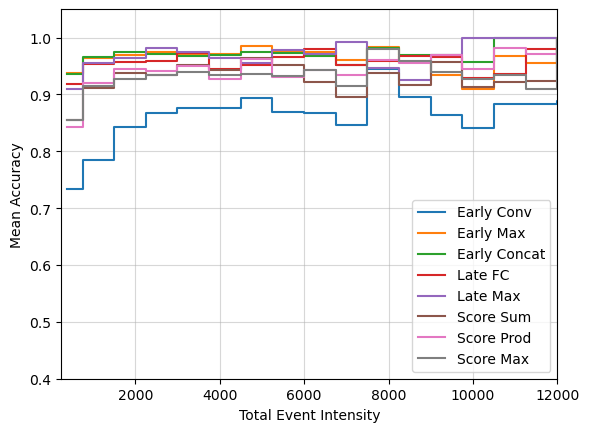

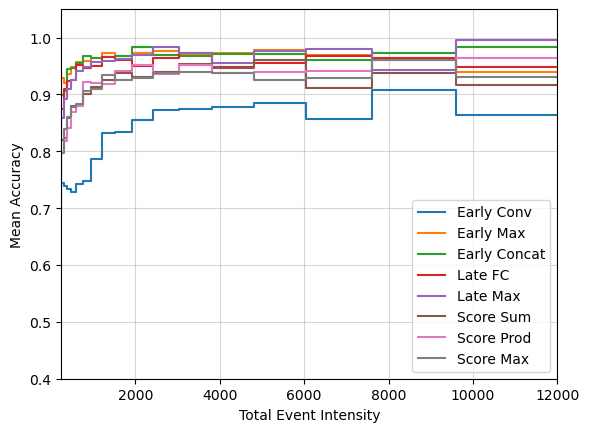

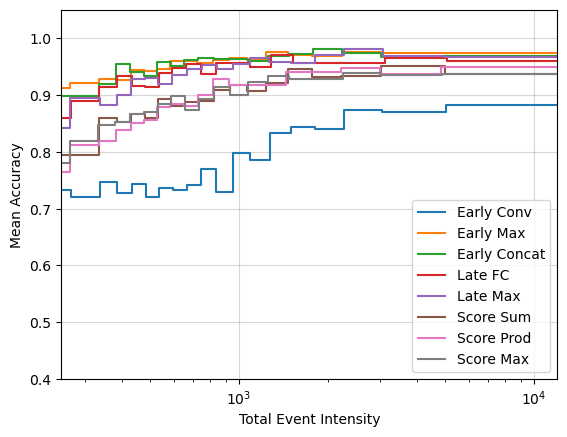

<Figure size 640x480 with 0 Axes>

In [140]:
# Using a loop
fusion_types_lin = []
for s in fusion_types:
    fusion_types_lin.append(s + "lin")

fusion_types_log = []
for s in fusion_types:
    fusion_types_log.append(s + "log")

fusion_types_quan = []
for s in fusion_types:
    fusion_types_quan.append(s + "quan")

print(fusion_types_quan)

load_and_plot_data(folder_path, labels, fusion_types_lin)
load_and_plot_data(folder_path, labels, fusion_types_log)
load_and_plot_data(folder_path, labels, fusion_types_quan,log=True)

_singleCNN_latefc
['roc_curve_All-MoDA-Base__singleCNN_latefc_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-30_21-08_fpr.npy']
['roc_curve_All-MoDA-Base__singleCNN_latefc_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-30_21-08_tpr.npy']
['roc_curve_All-MoDA-Base__singleCNN_latefc_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-30_21-08_roc_auc.npy']
earlyconv
['roc_curve_All-MoDA-Base_earlyconv_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-30_19-42_fpr.npy']
['roc_curve_All-MoDA-Base_earlyconv_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-30_19-42_tpr.npy']
['roc_curve_All-MoDA-Base_earlyconv_moda-base_100000events_256bsize_0.2drate_0.0005lrate_1e-05reg_512fil_notransf_nonorm_2024-01-30_19-42_roc_auc.npy']
earlymax
['roc_curve_All-MoDA-Base_earlymax_moda-bas

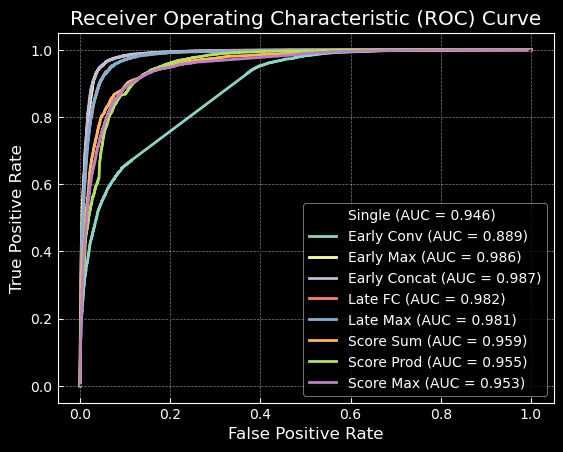

<Figure size 640x480 with 0 Axes>

In [153]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
import re

def load_and_plot_roc_data(fusion_types, labels, folder_path):
    plt.style.use('dark_background')
    #plt.style.use('default')
    for i, (fusion_type, label) in enumerate(zip(fusion_types, labels)):

        file_pattern_fpr = f"roc_curve_All-MoDA-Base_{fusion_type}_*fpr.npy"
        file_pattern_tpr = f"roc_curve_All-MoDA-Base_{fusion_type}_*tpr.npy"
        file_pattern_roc_auc = f"roc_curve_All-MoDA-Base_{fusion_type}_*roc_auc.npy"
    
        # Find matching files based on the fusion type
        matching_file_fpr =  [file for file in os.listdir(folder_path) if fnmatch.fnmatch(file, file_pattern_fpr)]
        matching_file_tpr =  [file for file in os.listdir(folder_path) if fnmatch.fnmatch(file, file_pattern_tpr)]
        matching_file_roc_auc =  [file for file in os.listdir(folder_path) if fnmatch.fnmatch(file, file_pattern_roc_auc)]


        print(fusion_type)
        print(matching_file_fpr)
        print(matching_file_tpr)
        print(matching_file_roc_auc)

        # Assuming the files are sorted lexicographically and the order is fpr, tpr, roc_auc
        file_path_fpr = os.path.join(folder_path, matching_file_fpr[0])
        file_path_tpr = os.path.join(folder_path, matching_file_tpr[0])
        file_path_roc_auc = os.path.join(folder_path, matching_file_roc_auc[0])

        fpr = np.load(file_path_fpr)
        tpr = np.load(file_path_tpr)
        roc_auc = np.load(file_path_roc_auc)

        if fusion_type == "_singleCNN_latefc":
            plt.plot(fpr, tpr, lw=2,ls="dotted",c="k",label=f'{label} (AUC = {roc_auc:.3f})')
        else:
            plt.plot(fpr, tpr, lw=2, alpha=1,label=f'{label} (AUC = {roc_auc:.3f})')
            

    plt.plot([0, 1], [0, 1], color='k', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.5)
    #plt.xlim([0,0.2])
    #plt.ylim([0.8,1])
    #plt.xscale("log")
    #plt.yscale("log")
    plt.show()
    pltname =  folder_path + "_Combined_ROC-Curve_Plot.png"
    plt.savefig(pltname,bbox_inches='tight')

# Example usage:
fusion_types = ["_singleCNN_latefc","earlyconv", "earlymax", "earlyconcat", "latefc","latemax", "scoresum", "scoreproduct","scoremax"] # LateMax and Scoreprod missing!! 
labels = ["Single" , "Early Conv", "Early Max", "Early Concat", "Late FC", "Late Max", "Score Sum", "Score Prod","Score Max"]
folder_path = '../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ROC/2023-01-30_run4'

#fusion_types = ["_singleCNN_scoresum", "scoresum", "scoreproduct","scoremax"] # LateMax and Scoreprod missing!! 
#labels = ["Single" , "Score Sum", "Score Prod", "Score Max"]
#folder_path = '../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ROC/2024-01-30_run3'


load_and_plot_roc_data(fusion_types, labels, folder_path)